<a href="https://colab.research.google.com/github/CaioEnzo23/Modelo-de-analise-das-metricas-RFV/blob/main/Desafio_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Setup**

Instalação de Bibliotecas

In [3]:
%pip install plotly
%pip install cufflinks
%pip install chart-studio

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.7 MB/s eta 0:00:00


In [2]:
!pip install pandas-profiling
!pip install sidetable
!pip install scikit-learn

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.2/356.2 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 23.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 23.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=4cf4ea985328f84ea76165e2305bf0640874d3ad6ab9c1f6e362ab5874771a12
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.9 MB/s eta 0:00:00


In [1]:
%%capture
%pip install KModes

Importação das principais bilbiotecas ultilizadas

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

import chart_studio.plotly as py
import cufflinks as cf

import plotly.graph_objects as go
import plotly.express as px

In [5]:
import missingno as msno
from ipywidgets import interact, widgets

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform
from sklearn.datasets import load_wine

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [7]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report

In [8]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, kelbow_visualizer, silhouette_visualizer
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN, MeanShift
from sklearn.cluster import k_means, dbscan, mean_shift, estimate_bandwidth
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

import string
from ipywidgets import interact

#**Análise exploratória dos dados**

Carregue a base de dados

In [10]:
df = pd.read_excel("/content/data.xlsx")

Realize uma descrição estatística dos dados

In [11]:
descricao = df.describe()
print(descricao)

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000


Visualize as distribuições e identifique a relevância das colunas para a análise

In [12]:
print("Primeiras linhas do DataFrame:")
print(df.head())

Primeiras linhas do DataFrame:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-01-12 08:26:00       2.55     17850.0  United Kingdom  
1  2010-01-12 08:26:00       3.39     17850.0  United Kingdom  
2  2010-01-12 08:26:00       2.75     17850.0  United Kingdom  
3  2010-01-12 08:26:00       3.39     17850.0  United Kingdom  
4  2010-01-12 08:26:00       3.39     17850.0  United Kingdom  


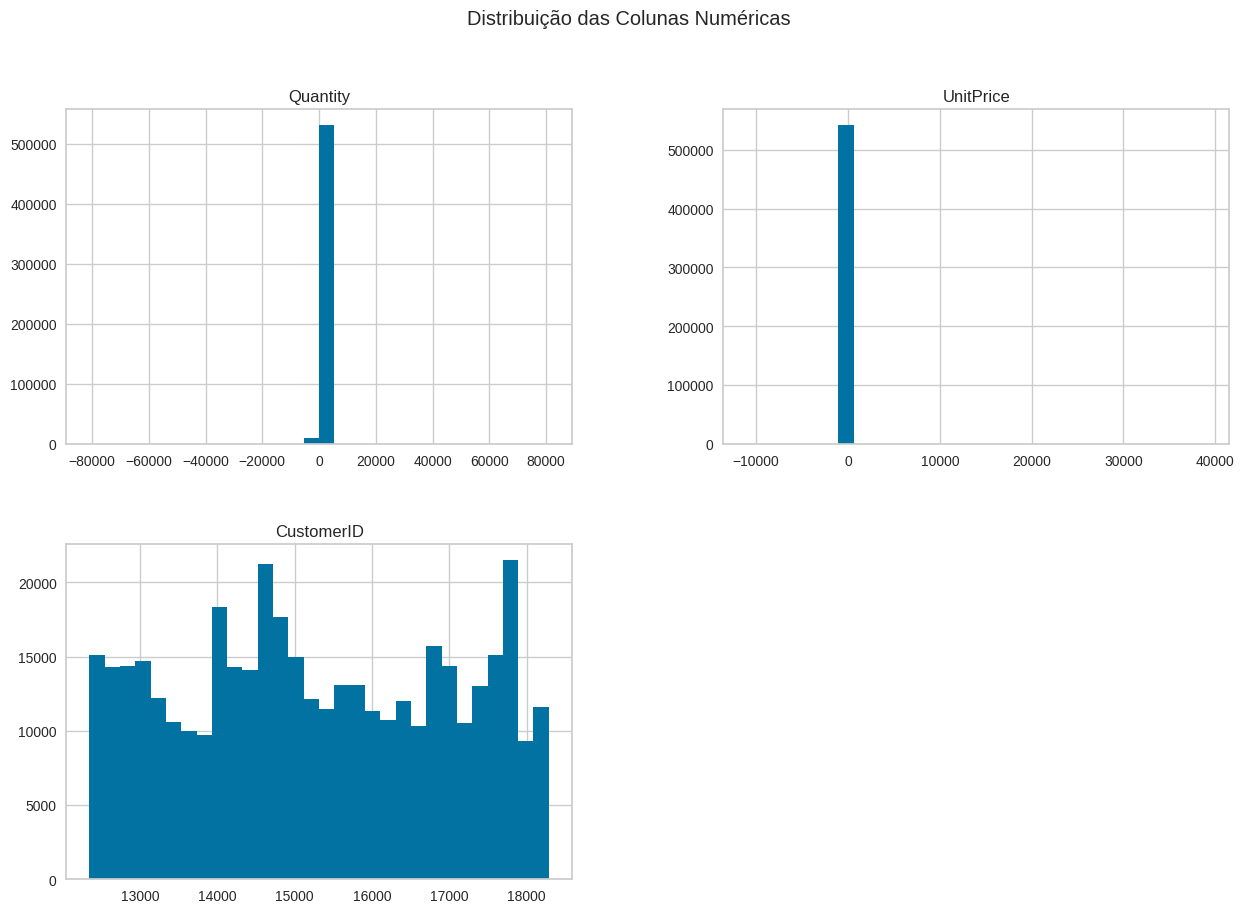

In [13]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribuição das Colunas Numéricas')
plt.show()

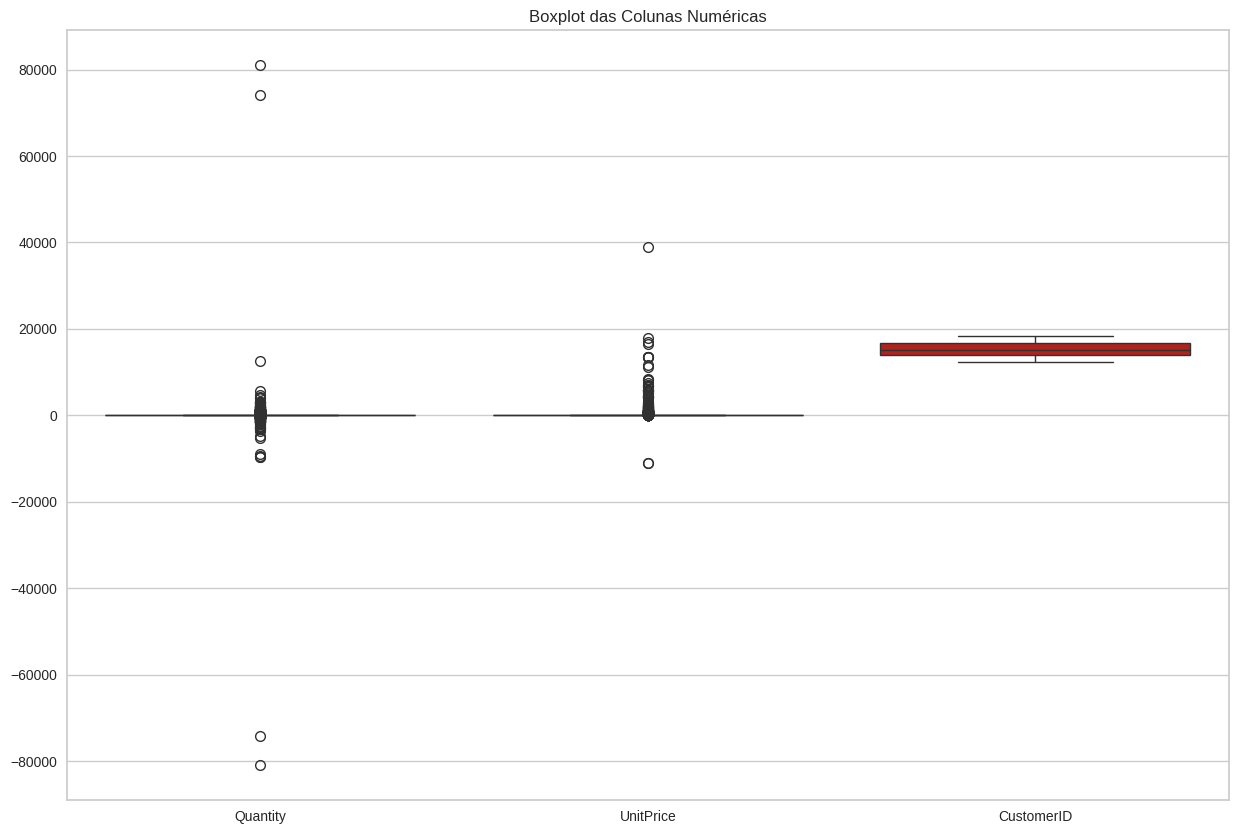

In [14]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Boxplot das Colunas Numéricas')
plt.show()

In [15]:
for col in df.columns:
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except:
        pass

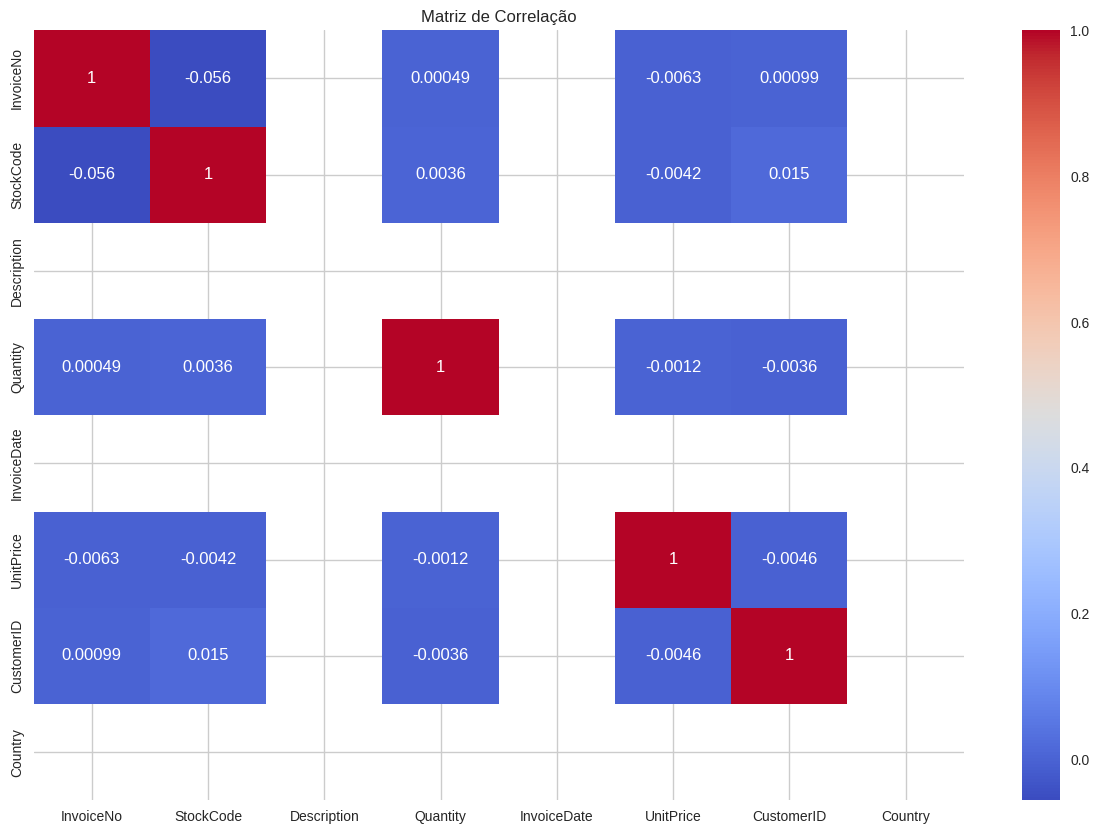

In [16]:
plt.figure(figsize=(15, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

Verifique a presença de dados nulos, duplicados, outliers e demais inconsistências
nos dados

In [18]:
print("\nDados Nulos por Coluna:")
print(df.isnull().sum())


Dados Nulos por Coluna:
InvoiceNo        9291
StockCode       54873
Description    541908
Quantity            0
InvoiceDate    541909
UnitPrice           0
CustomerID     135080
Country        541909
dtype: int64


In [19]:
print("\nNúmero de Linhas Duplicadas:")
print(df.duplicated().sum())


Número de Linhas Duplicadas:
19393


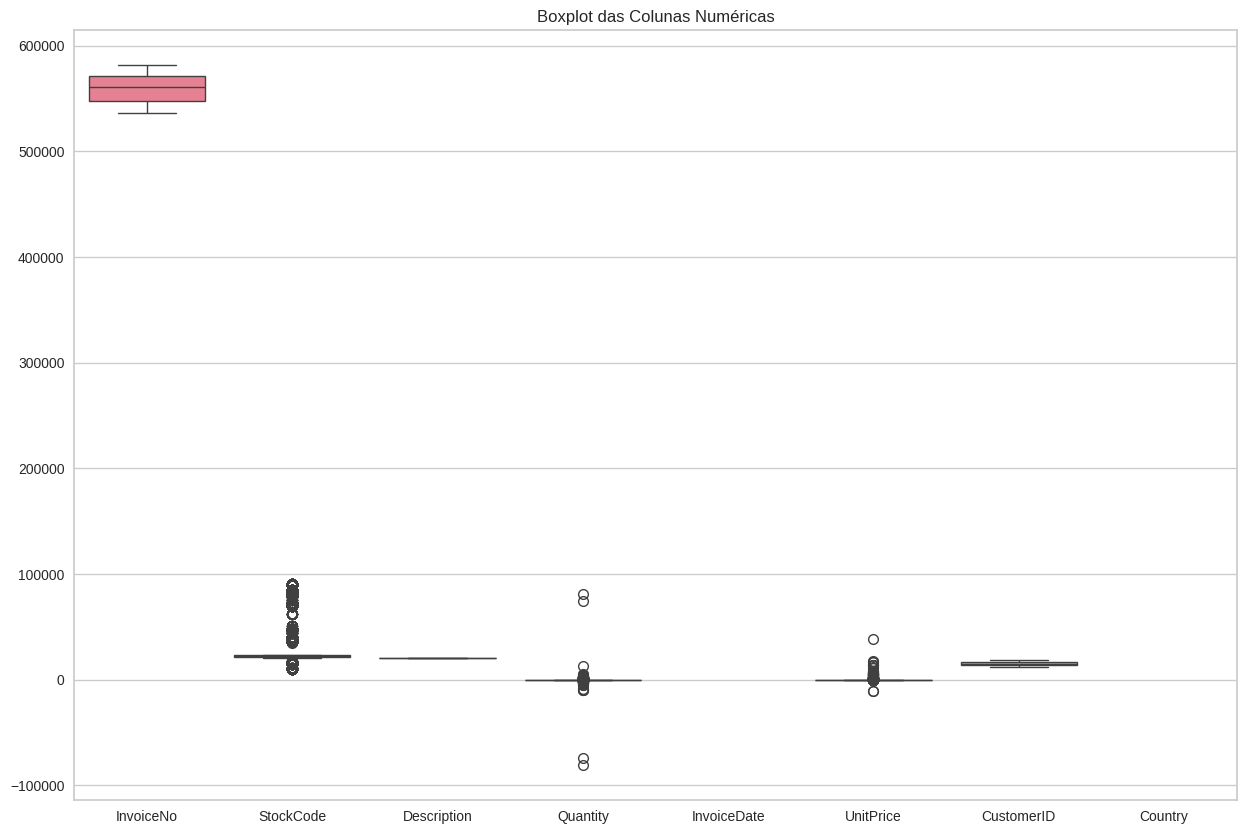

In [20]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.title('Boxplot das Colunas Numéricas')
plt.show()

In [21]:
print("\nEstatísticas Descritivas:")
print(df.describe())


Estatísticas Descritivas:
           InvoiceNo      StockCode  Description       Quantity  InvoiceDate  \
count  532618.000000  487036.000000          1.0  541909.000000          0.0   
mean   559965.752027   27089.272460      20713.0       9.552250          NaN   
std     13428.417281   15977.952954          NaN     218.081158          NaN   
min    536365.000000   10002.000000      20713.0  -80995.000000          NaN   
25%    547906.000000   21928.000000      20713.0       1.000000          NaN   
50%    560688.000000   22560.000000      20713.0       3.000000          NaN   
75%    571841.000000   23139.000000      20713.0      10.000000          NaN   
max    581587.000000   90208.000000      20713.0   80995.000000          NaN   

           UnitPrice     CustomerID  Country  
count  541909.000000  406829.000000      0.0  
mean        4.611114   15287.690570      NaN  
std        96.759853    1713.600303      NaN  
min    -11062.060000   12346.000000      NaN  
25%         1.250

Tratando os tipos de dados

In [22]:
tipos_de_dados = df.dtypes

print(tipos_de_dados)

InvoiceNo      float64
StockCode      float64
Description    float64
Quantity         int64
InvoiceDate    float64
UnitPrice      float64
CustomerID     float64
Country        float64
dtype: object


In [23]:
df['InvoiceNo'] = df['InvoiceNo'].replace([np.inf, -np.inf], np.nan).fillna(0).astype(int)

In [24]:
print(df['CustomerID'].isnull().sum())  # Check for NaN values
print(df['CustomerID'].isin([np.inf, -np.inf]).sum())

135080
0


In [25]:
df = df.dropna(subset=['CustomerID'])

In [26]:
df['CustomerID'] = df['CustomerID'].replace([np.inf, -np.inf, np.nan], -1).astype(int)

In [27]:
df = df.astype({"StockCode":"object", "Description":"object",
                 "Quantity":"int","UnitPrice":"float",
                 "CustomerID":"int","Country":"object"})
df.dtypes

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate    float64
UnitPrice      float64
CustomerID       int64
Country         object
dtype: object

In [28]:
df = pd.DataFrame(df)

In [29]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

print(df.dtypes)

InvoiceNo               int64
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object


#**Pré-processamento dos dados**

Realize a normalização dos dados

In [30]:
df['InvoiceDate'].fillna(pd.Timestamp.min, inplace=True)

In [31]:
df['InvoiceDate'] = df['InvoiceDate'].astype(int) / 10**9

In [32]:
scaler = MinMaxScaler()


In [33]:
colunas_normalizadas = ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
df[colunas_normalizadas] = scaler.fit_transform(df[colunas_normalizadas])

print(df)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:480: RuntimeWarning:

All-NaN slice encountered

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:481: RuntimeWarning:

All-NaN slice encountered



        InvoiceNo  StockCode  Description  Quantity  InvoiceDate  UnitPrice  \
0        0.922244        NaN          NaN  0.500037          0.0   0.000065   
1        0.922244   0.761177          NaN  0.500037          0.0   0.000087   
2        0.922244        NaN          NaN  0.500049          0.0   0.000071   
3        0.922244        NaN          NaN  0.500037          0.0   0.000087   
4        0.922244        NaN          NaN  0.500037          0.0   0.000087   
...           ...        ...          ...       ...          ...        ...   
541904   1.000000   0.157233          NaN  0.500074          0.0   0.000022   
541905   1.000000   0.160798          NaN  0.500037          0.0   0.000054   
541906   1.000000   0.165225          NaN  0.500025          0.0   0.000106   
541907   1.000000   0.165237          NaN  0.500025          0.0   0.000106   
541908   1.000000   0.151310          NaN  0.500019          0.0   0.000127   

        CustomerID  Country  
0         0.926443   

Faça uma seleção das variáveis mais relevantes para o modelo

Remova os dados nulos, duplicados, outliers e inconsistentes

In [34]:
print(df.isnull().sum())

InvoiceNo           0
StockCode       35809
Description    406829
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID          0
Country        406829
dtype: int64


In [35]:
df.fillna(0, inplace=True)

In [36]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df = remove_outliers(df, column)

In [37]:
df.to_csv('dados_limpos.csv', index=False)

#**Selecione um algoritmo de clusterização**

Escolha um algoritmo adequado para base de dados, como o K0Means, DBSCAN,
Hierarquia ou Mean Shift


**K0Means vai ser o algoritmo ultilizado**

K-Means é o método mais eficiente e prático para os cenários de e-commerce por várias razões:

Simplicidade e Eficiência: É fácil de implementar e computacionalmente eficiente, o que é ideal para grandes volumes de dados comuns em e-commerce.
Facilidade de Interpretação: Produz clusters bem definidos que são facilmente interpretáveis, o que ajuda na tomada de decisões e na criação de estratégias de marketing personalizadas.
Ferramentas de Suporte: Muitas ferramentas de análise de dados e plataformas de machine learning oferecem suporte robusto para K-Means, incluindo visualizações que ajudam a simplificar a análise.
Para uma abordagem inicial, K-Means é a escolha mais recomendada. Caso seja necessário lidar com muitos outliers ou identificar clusters de formas mais complexas, DBSCAN pode ser explorado como uma alternativa.

Encontre a quantidade ideal de clusters através dos métodos de Elbow ou
Silhouette Score


In [40]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.select_dtypes(include=[np.number]))

In [41]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

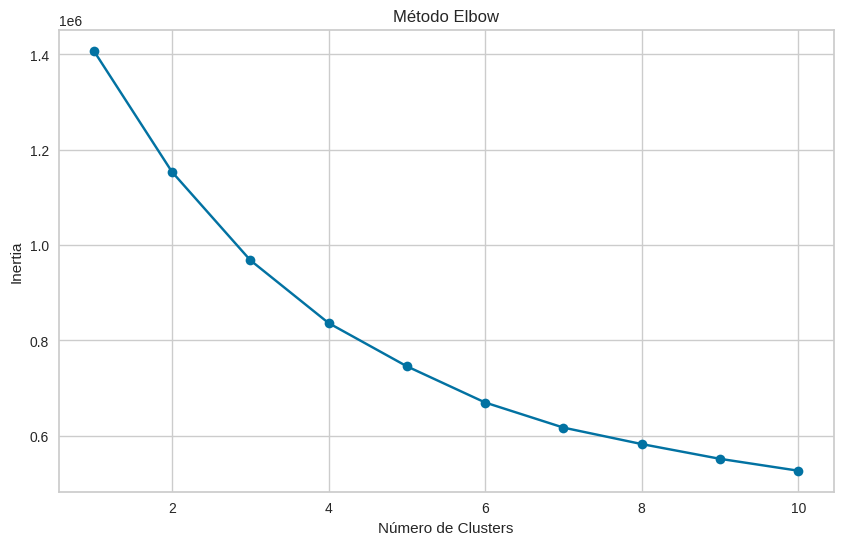

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.title('Método Elbow')
plt.show()

 Implemente o algoritmo escolhido

In [83]:
x_dim,y_dim = datasets.make_blobs(n_samples=int(5E3), n_features=8, centers=4, cluster_std=8, random_state=0)
df_dim = pd.DataFrame(x_dim, columns=list(string.ascii_uppercase[:x_dim.shape[1]]))
df_dim.head()

,A,B,C,D,E,F,G,H
0,-5.801935,7.019708,9.149539,4.073670,6.176773,2.280067,3.910487,11.072835
1,6.332769,12.339141,-3.755659,-0.482005,3.541367,-1.952639,-3.057236,23.241906
2,7.231151,-0.460993,3.606526,-1.071281,-3.889233,11.737819,2.287030,-1.592674
3,-18.577493,-5.358183,-16.504333,12.860896,6.129906,1.014417,-9.226354,16.610941
4,-5.336238,-5.715467,9.665305,4.304737,3.209161,9.300217,-4.788589,-14.132972


In [84]:
pca = PCA()
pca_components = pca.fit_transform(df_dim)

df_pca = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(pca_components.shape[1])])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-8.198343,-8.431842,9.219331,1.086151,-0.609612,-0.124759,2.491770,-3.004923
1,-9.750999,6.724039,16.503809,-0.360351,-1.491400,6.353914,-13.195726,-5.873117
2,12.157724,1.366009,6.813313,-7.683051,-0.808270,-2.960167,3.773024,2.831707
3,-23.036802,8.435623,-12.901580,-2.600540,-12.341406,6.769756,-2.291717,3.393993
4,12.272146,-8.033761,-10.322442,0.913121,1.028609,-2.201866,11.085019,4.056562


In [85]:
pd.DataFrame(
    {'explained_var': pca.explained_variance_ratio_, 'explained_var_cumsum': pca.explained_variance_ratio_.cumsum()},
    index=df_pca.columns
)

,explained_var,explained_var_cumsum
PC1,0.272326,0.272326
PC2,0.156056,0.428382
PC3,0.122037,0.550419
PC4,0.096689,0.647108
PC5,0.092254,0.739362
PC6,0.090393,0.829755
PC7,0.087281,0.917036
PC8,0.082964,1.000000


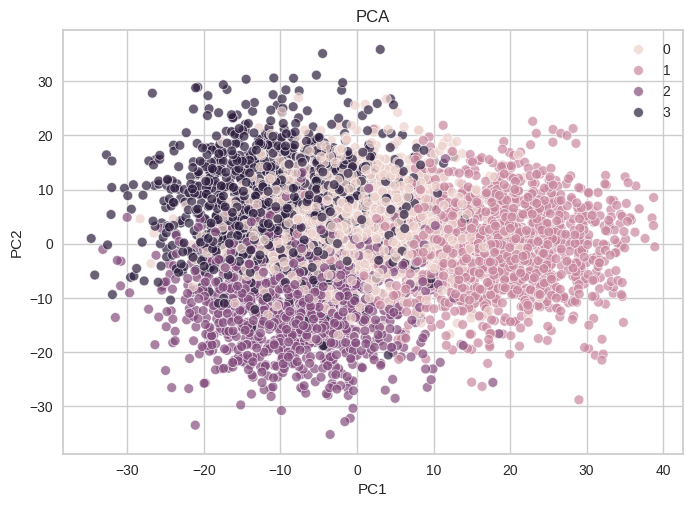

In [86]:
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=y_dim, **scatter_kwargs);
plt.title('PCA')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



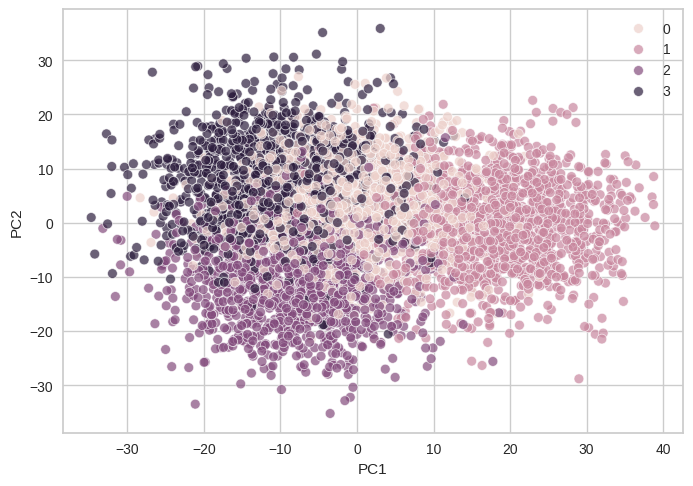

In [87]:
labels = k_means(df_pca.iloc[:,:3], 4)[1]
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=y_dim, **scatter_kwargs);

In [88]:
px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color=labels, template='plotly_dark')

#**Analise os clusters obtidos**

Identifique os padrões e características em comum entre os clientes

In [68]:
model = KMeans(n_clusters=10)
model.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=10)

In [69]:
labels = model.labels_

In [75]:
silhouette_score(x, labels)

0.321291269581875

In [76]:
davies_bouldin_score(x, labels)

0.8504441076036425

In [77]:
calinski_harabasz_score(x, labels)

3125.0732721591216

 Plote gráficos para auxiliar na análise

In [71]:
kelbow_visualizer?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

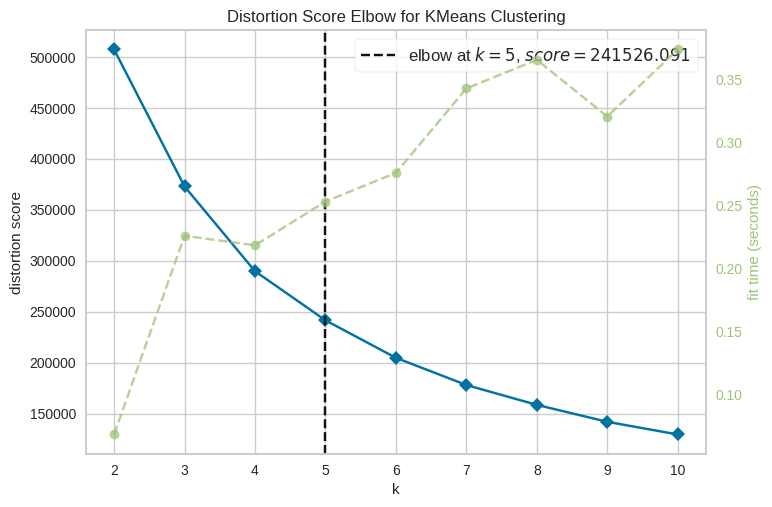

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=10))

In [72]:
kelbow_visualizer(KMeans(), x, k=10)

In [73]:
silhouette_visualizer?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



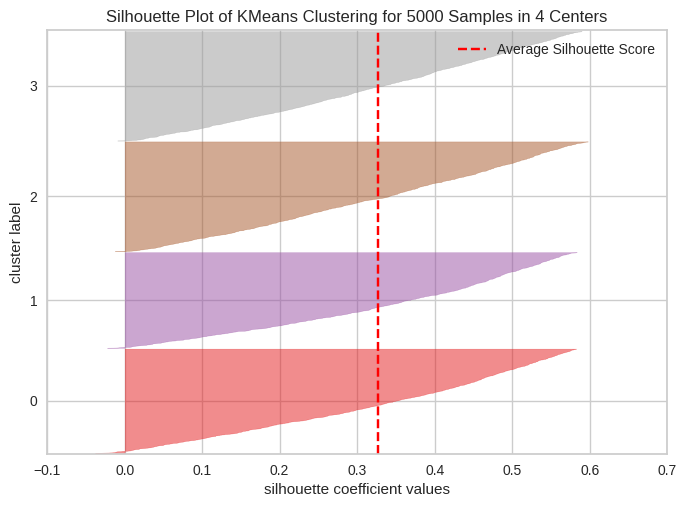

SilhouetteVisualizer(ax=<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 5000 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     estimator=KMeans(n_clusters=4))

In [74]:
silhouette_visualizer(KMeans(n_clusters=4), x)

In [80]:
cluster_metrics = silhouette_score, davies_bouldin_score, calinski_harabasz_score
cluster_metrics_results = []

for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=0)
    labels = model.fit_predict(x)
    cluster_results_dict = {'k':k}
    cluster_results_dict['inertia'] = model.inertia_
    for metric in cluster_metrics:
        cluster_results_dict[metric.__name__] = metric(x, labels)
    cluster_metrics_results.append(cluster_results_dict)

    cluster_metrics_results

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

In [82]:
pd.DataFrame(cluster_metrics_results).set_index('k').style.background_gradient()

,inertia,silhouette_score,davies_bouldin_score,calinski_harabasz_score
k,,,,
2,507381.738607,0.364497,1.060807,3467.332946
3,372918.482996,0.336580,0.979657,3259.236193
4,289789.549862,0.327528,0.914223,3273.324671
5,241524.859162,0.319460,0.907520,3194.457867
6,204744.922168,0.321860,0.883596,3193.500460
7,177967.656435,0.318480,0.893507,3186.244722
8,158625.524981,0.319567,0.845571,3150.479008
9,141918.246176,0.321415,0.828908,3153.979456
10,129774.498180,0.316504,0.852163,3117.157120


#**Dados de Clientes**

Clientes que compram os mesmos produtos

In [94]:
df = pd.read_excel("/content/data.xlsx")

In [95]:
purchase_matrix = df.pivot_table(index='CustomerID', columns='Description', aggfunc='size', fill_value=0) # Changed 'CustumerID' to 'CustomerID'

In [96]:
scaler = StandardScaler()
purchase_matrix_scaled = scaler.fit_transform(purchase_matrix)

In [97]:
pca = PCA(n_components=2)
purchase_matrix_pca = pca.fit_transform(purchase_matrix_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

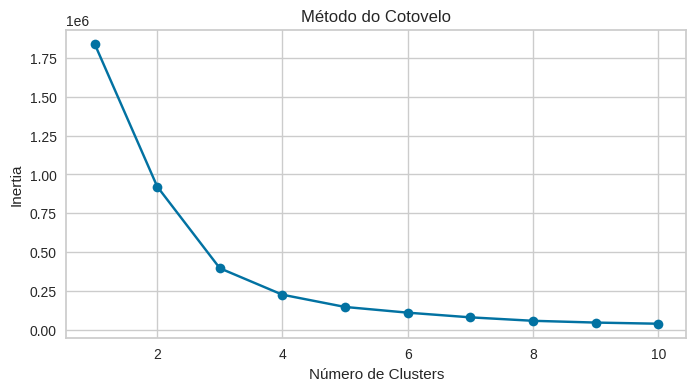

In [98]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(purchase_matrix_pca)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.show()

In [99]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(purchase_matrix_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [100]:
purchase_matrix['Cluster'] = clusters

In [101]:
for cluster in range(4):
    print(f"Cluster {cluster}")
    cluster_data = purchase_matrix[purchase_matrix['Cluster'] == cluster]
    common_products = cluster_data.drop('Cluster', axis=1).sum().sort_values(ascending=False).head(10)
    print(common_products)

Cluster 0
Description
WHITE HANGING HEART T-LIGHT HOLDER    1393
REGENCY CAKESTAND 3 TIER              1371
JUMBO BAG RED RETROSPOT               1126
ASSORTED COLOUR BIRD ORNAMENT         1078
POSTAGE                                968
PARTY BUNTING                          963
SET OF 3 CAKE TINS PANTRY DESIGN       874
LUNCH BAG RED RETROSPOT                798
NATURAL SLATE HEART CHALKBOARD         747
PAPER CHAIN KIT 50'S CHRISTMAS         726
dtype: int64
Cluster 1
Description
CARRIAGE                              85
REGENCY CAKESTAND 3 TIER              74
POPCORN HOLDER                        53
ROSES REGENCY TEACUP AND SAUCER       51
WHITE HANGING HEART T-LIGHT HOLDER    50
GREEN REGENCY TEACUP AND SAUCER       49
VINTAGE SNAP CARDS                    45
BAKING SET 9 PIECE RETROSPOT          44
PAPER CHAIN KIT 50'S CHRISTMAS        43
PACK OF 72 RETROSPOT CAKE CASES       42
dtype: int64
Cluster 2
Description
CHILLI LIGHTS                          65
BLUE/CREAM STRIPE CUSHION 

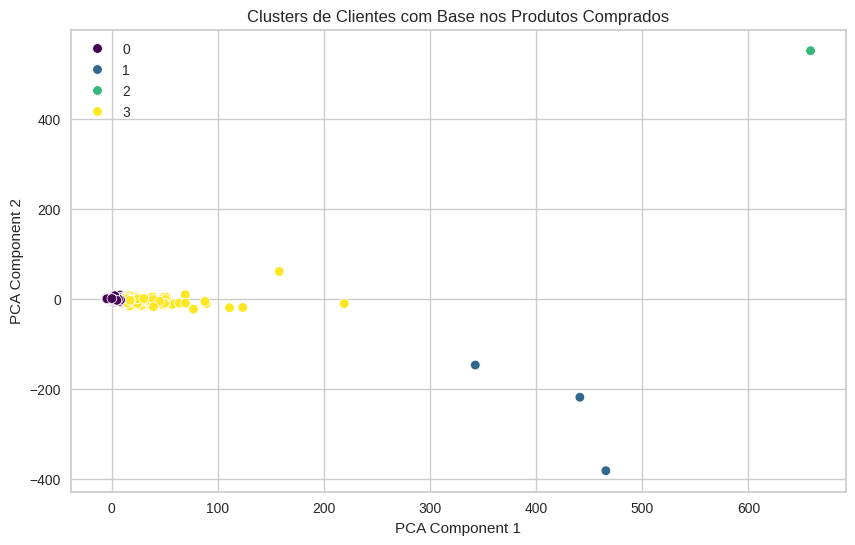

In [102]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=purchase_matrix_pca[:, 0], y=purchase_matrix_pca[:, 1], hue=clusters, palette='viridis')
plt.title('Clusters de Clientes com Base nos Produtos Comprados')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

Clientes que possuem a mesma frequência de compras

In [103]:
df = pd.read_excel("/content/data.xlsx")

In [105]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['year_month'] = df['InvoiceDate'].dt.to_period('M')
frequency = df.groupby(['CustomerID', 'year_month']).size().reset_index(name='UnitPrice')
frequency_summary = frequency.groupby('CustomerID')['UnitPrice'].sum().reset_index()

In [107]:
scaler = StandardScaler()
frequency_summary_scaled = scaler.fit_transform(frequency_summary[['UnitPrice']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

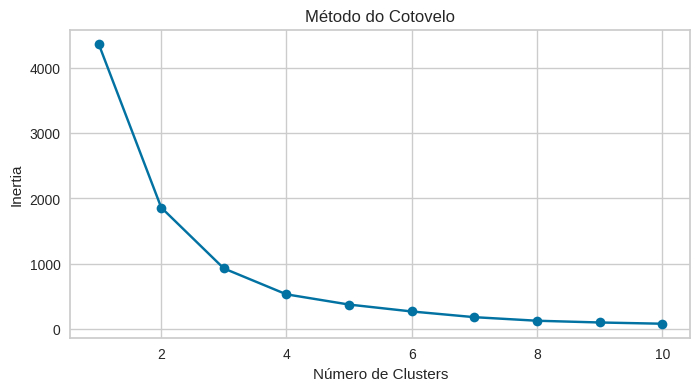

In [108]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(frequency_summary_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.show()

In [109]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(frequency_summary_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [110]:
frequency_summary['Cluster'] = clusters

In [111]:
for cluster in range(4):
    print(f"Cluster {cluster}")
    cluster_data = frequency_summary[frequency_summary['Cluster'] == cluster]
    print(cluster_data.describe())

Cluster 0
         CustomerID    UnitPrice  Cluster
count   3862.000000  3862.000000   3862.0
mean   15291.588814    49.753755      0.0
std     1722.691908    44.812998      0.0
min    12346.000000     1.000000      0.0
25%    13801.250000    15.000000      0.0
50%    15288.500000    34.000000      0.0
75%    16764.500000    73.000000      0.0
max    18287.000000   189.000000      0.0
Cluster 1
         CustomerID    UnitPrice  Cluster
count      4.000000     4.000000      4.0
mean   14899.000000  5914.000000      1.0
std     2154.616594  1473.845537      0.0
min    12748.000000  4642.000000      1.0
25%    13759.000000  5006.500000      1.0
50%    14503.500000  5515.500000      1.0
75%    15643.500000  6423.000000      1.0
max    17841.000000  7983.000000      1.0
Cluster 2
         CustomerID    UnitPrice  Cluster
count     24.000000    24.000000     24.0
mean   15145.166667  1349.750000      2.0
std     1407.926495   508.637759      0.0
min    13081.000000   872.000000      2.0
25% 

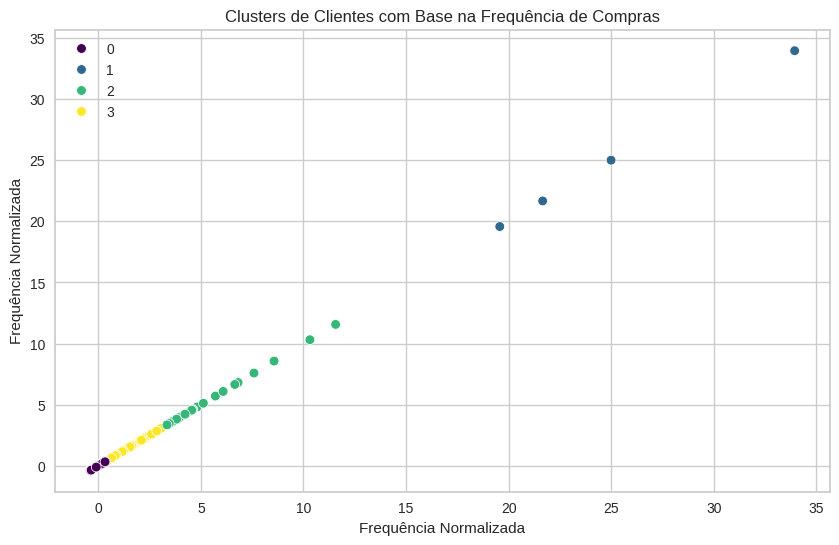

In [112]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=frequency_summary_scaled[:, 0], y=frequency_summary_scaled[:, 0], hue=clusters, palette='viridis')
plt.title('Clusters de Clientes com Base na Frequência de Compras')
plt.xlabel('Frequência Normalizada')
plt.ylabel('Frequência Normalizada')
plt.show()

Clientes que gastam mais dinheiro em suas compras

In [113]:
df = pd.read_excel("/content/data.xlsx")

In [114]:
monetary = df.groupby('CustomerID')['UnitPrice'].sum().reset_index()

In [115]:
scaler = StandardScaler()
monetary_scaled = scaler.fit_transform(monetary[['UnitPrice']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will 

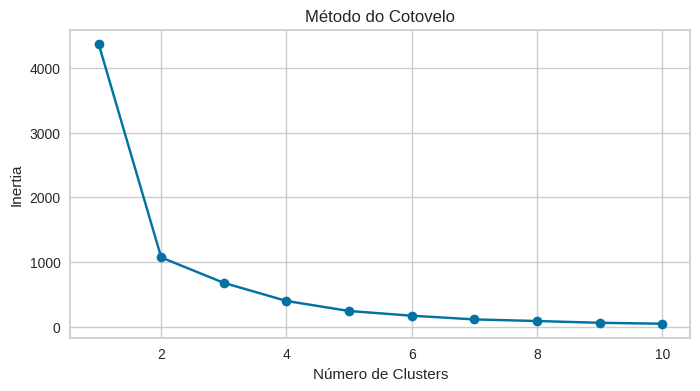

In [116]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(monetary_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inertia')
plt.show()

In [117]:
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(monetary_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [118]:
monetary['Cluster'] = clusters

In [119]:
for cluster in range(4):
    print(f"Cluster {cluster}")
    cluster_data = monetary[monetary['Cluster'] == cluster]
    print(cluster_data.describe())

Cluster 0
         CustomerID    UnitPrice  Cluster
count   4129.000000  4129.000000   4129.0
mean   15306.932187   191.211723      0.0
std     1717.606073   199.579330      0.0
min    12346.000000     0.000000      0.0
25%    13822.000000    49.050000      0.0
50%    15314.000000   118.690000      0.0
75%    16777.000000   259.500000      0.0
max    18287.000000   954.780000      0.0
Cluster 1
         CustomerID     UnitPrice  Cluster
count      5.000000      5.000000      5.0
mean   14379.600000  19584.806000      1.0
std     2420.639234   5282.062295      0.0
min    12536.000000  13255.220000      1.0
25%    12744.000000  15115.600000      1.0
50%    12748.000000  20333.180000      1.0
75%    16029.000000  24111.140000      1.0
max    17841.000000  25108.890000      1.0
Cluster 2
         CustomerID    UnitPrice  Cluster
count    235.000000   235.000000    235.0
mean   15199.425532  1734.752511      2.0
std     1798.555728  1164.333612      0.0
min    12352.000000   966.070000     

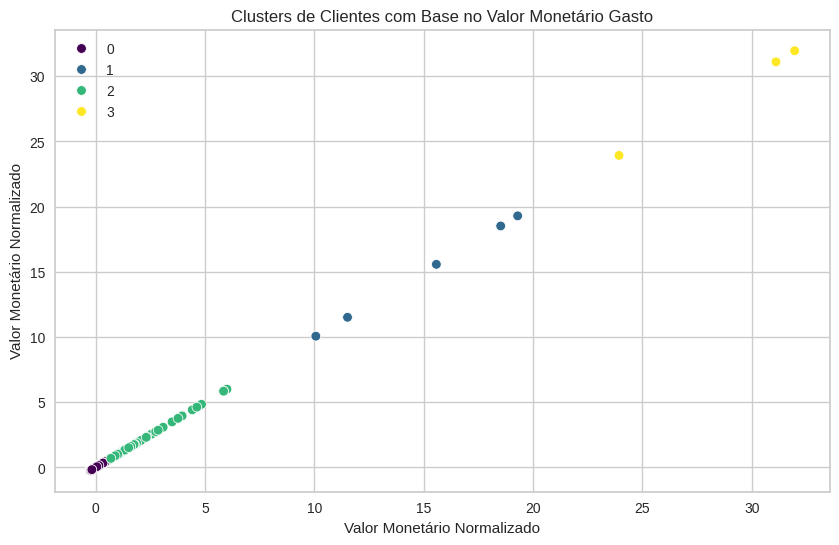

In [120]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=monetary_scaled[:, 0], y=monetary_scaled[:, 0], hue=clusters, palette='viridis')
plt.title('Clusters de Clientes com Base no Valor Monetário Gasto')
plt.xlabel('Valor Monetário Normalizado')
plt.ylabel('Valor Monetário Normalizado')
plt.show()

#**Interpretação dos resultados obtidos**

**Descreva o perfil de compras dos clientes de cada cluster**

O cluster do "Clientes que compram os mesmos produtos" são bem randomicos e dispersos ou seja são bem imprevisiveis porém os clusters "Clientes que possuem a mesma frequência de compras" e "Clientes que gastam mais dinheiro em suas compras" são bem lineares ou seja tem maior taxa de sucesso trabalhar com eles para melhorar a preformace do E-comerce

**Justifique como essa análise pode ser útil para empresa para segmentação de
seus clientes e personalização das campanhas de marketing**

A análise de clustering dos clientes com base no valor monetário gasto pode ser extremamente útil para uma empresa de várias maneiras, especialmente para segmentação de clientes e personalização das campanhas de marketing

1. **Segmentação de Clientes**
> a. Identificação de Grupos Distintos
*   Descrição: A análise de clustering permite identificar grupos distintos de clientes com base em seus padrões de gastos.
*   Benefício: Entender esses grupos ajuda a empresa a tratar cada segmento de maneira específica, reconhecendo que os clientes não são homogêneos e possuem comportamentos de compra variados.





> b. Priorização de Recursos
*   Descrição: Com a segmentação, a empresa pode alocar recursos de marketing de maneira mais eficiente, focando nos segmentos mais lucrativos.
*   Benefício: Isso maximiza o retorno sobre o investimento (ROI) em campanhas de marketing, pois os esforços são direcionados para os clientes que têm maior probabilidade de gerar receitas significativas.

2. **Personalização das Campanhas de Marketing**
> a. Campanhas Direcionadas
*   Descrição: Conhecendo os perfis de gastos dos diferentes clusters, a empresa pode criar campanhas de marketing personalizadas que ressoem melhor com cada grupo.
*   Benefício: As mensagens de marketing personalizadas são mais eficazes em capturar a atenção dos clientes e incentivá-los a realizar compras, aumentando a taxa de conversão.

>  b. Ofertas Personalizadas
*   Descrição: Para os "big spenders", a empresa pode oferecer programas de fidelidade exclusivos e benefícios adicionais. Para os "low spenders", promoções e descontos significativos podem ser usados para incentivar maiores compras.
*   Benefício: Ofertas personalizadas aumentam a satisfação e a lealdade do cliente, além de incentivar compras repetidas.

>  c. Estratégias de Retenção
*   Descrição: Clientes que gastam menos ou compram com pouca frequência podem ser alvo de campanhas de reengajamento, como e-mails personalizados e ofertas especiais.
*  Benefício: Isso ajuda a reduzir a taxa de churn, mantendo mais clientes ativos e aumentando a receita ao longo do tempo.

3. **Melhoria da Experiência do Cliente**

> a. Atendimento Personalizado
*  Descrição: Com a segmentação clara, a empresa pode oferecer um atendimento ao cliente mais personalizado, ajustando o serviço para atender melhor as necessidades de cada segmento.
*  Benefício: Um atendimento personalizado aumenta a satisfação do cliente e pode transformar compradores ocasionais em clientes leais.

4. **Previsão e Planejamento**

> a. Planejamento de Estoque
*  Descrição: Entendendo quais produtos são mais comprados pelos diferentes clusters, a empresa pode planejar melhor o estoque, garantindo que os produtos certos estejam disponíveis para os clientes certos.
*  Benefício: Isso reduz o risco de excesso ou falta de estoque, otimiza a logística e melhora a eficiência operacional.

> b. Desenvolvimento de Novos Produtos
*  Descrição: A análise de clusters pode revelar oportunidades de mercado para o desenvolvimento de novos produtos que atendam às necessidades específicas de diferentes segmentos de clientes.
*  Benefício: Isso permite à empresa inovar de maneira direcionada, criando produtos que têm maior probabilidade de sucesso no mercado.

5. **Análise de Competitividade**

> a. Benchmarking Interno
*  Descrição: A empresa pode comparar o desempenho de diferentes clusters ao longo do tempo, ajustando suas estratégias de marketing conforme necessário para melhorar o desempenho.
*  Benefício: Isso proporciona uma vantagem competitiva ao permitir que a empresa reaja rapidamente às mudanças no comportamento do cliente e nas tendências do mercado.

**Conclusão**

A análise de clustering baseada no valor monetário gasto pelos clientes oferece uma riqueza de insights que podem ser usados para segmentar a base de clientes de maneira eficaz e personalizar campanhas de marketing. Isso não só melhora a eficácia das estratégias de marketing, mas também aumenta a satisfação do cliente, promove a lealdade e maximiza a receita da empresa.

**Sugira ações possíveis com base nas ações realizadas**

Concentrar os Esforços do Marketing nos "Clientes que possuem a mesma frequência de compras" e "Clientes que gastam mais dinheiro em suas compras" usando os dados que tem o qual são mais precisos e lineares